# Group Project 
By Ashley Snell, Jeremy Taylor, Sydney Small

We are looking at what models work best for our data when we use age and education as predictors for whether or not people are users of marijuana. Users are people who have used in the last month. 

Our question is a binary classification question. The importance is related to gaining insight into who and why people use marijuana. 

In [1]:
import pandas as pa
import numpy as np
import numpy.random as rn
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.colors as pltco
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

druguser = pa.read_csv("drug_consumption.csv", names = ['ID',
'Age',
'Gender',
'Education',
'Country',
'Ethnicity',
'Nscore',
'Escore',
'Oscore',
'Ascore',
'Cscore',
'Impulsive',
'SS',
'Alcohol',
'Amphet',
'Amyl',
'Benzos',
'Caff',
'Cannabis',
'Choc',
'Coke',
'Crack',
'Ecstasy',
'Heroin',
'Ketamine',
'Legalh',
'LSD',
'Meth',
'Mushrooms',
'Nicotine',
'Semer',
'VSA'])

druguser.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [2]:
names = {'CL0':0,'CL1':0,'CL2':0,'CL3':0,'CL4':1,'CL5':1,'CL6':1,0:0, 1:1} #only counting people who used in last month as users.
druguser.Cannabis = druguser.Cannabis.map(names)
druguser.Semer = druguser.Semer.map(names)
druguser.Nicotine = druguser.Nicotine.map(names)
druguser.LSD = druguser.LSD.map(names)
druguser.Mushrooms = druguser.Mushrooms.map(names)
druguser.Ecstasy = druguser.Ecstasy.map(names)
druguser.Coke = druguser.Coke.map(names)
druguser.Alcohol = druguser.Alcohol.map(names)

This helps classify 0 as a person who has not used in the last month, and 1 as a user within the last month. This helps minimize our variables down to 2 instead of 7, focusing our testing.

## PCA
We attempt to use PCA to determine a linear combination of variables and what 2 impact the data most. 

[0.26966741 0.1913091  0.11649396 0.1143996  0.08491502]


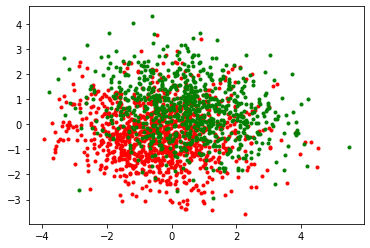

In [3]:
XX = np.array(druguser[['Cscore','Escore','Ascore','Nscore','Impulsive','Oscore','Age','Gender','Education']])
y = np.array(druguser['Cannabis'])
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
XXpca = pca.fit_transform(XX);
plt.plot(XXpca[y==0, 0], XXpca[y==0, 1], 'r.')
plt.plot(XXpca[y==1, 0], XXpca[y==1, 1], 'g.');
print(pca.explained_variance_ratio_)

PCA did not work (0.26 as the highest impact variable). None of the variables had an immense impact compared to the others.

In [4]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]


clf = KNeighborsClassifier(n_neighbors=100) # Define the model
clf.fit(X_train, y_train); # Train the model

# Attempt at using K Nearest Neighbors, adjusted to best fit graph and see distinction.

In [5]:
def plot_cat_model(clf, X_train, y_train, X_test, y_test):

    h = 0.01 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 0.25, X_train[:, 0].max() + 0.25
    y_min, y_max = X_train[:, 1].min() - 0.25, 3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))

## Predictors
We chose the predictors based off the content knowledge that Age and Education have a great impact on people's lifestyle choices. This has proven through the selected models to be accurate. We have tested multiple models and found the ones above to be the best fit for our data set and in showing the corrrelations.

## K nearest neighbors

Training Error: 0.7354111405835544
Testing Error: 0.7374005305039788


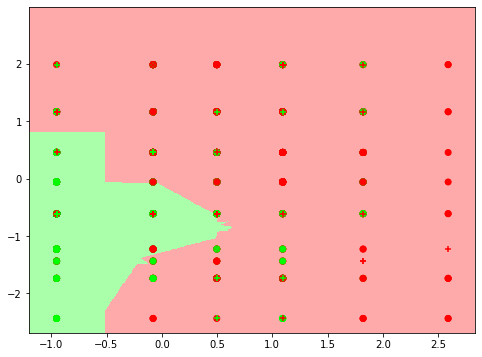

In [6]:
plot_cat_model(clf, X_train, y_train, X_test, y_test)

## Age, Education and Cannabis use
This model for Age, Education and Marjuana had an okay Training formulation but the testing error is drastically lower than the training. Marjuana is hard to have a clear separation because it is a widely used drug amongst all ages and educations. The general trend, however, is  there is more usage among younger, less educated people. 
We do need to consider the fact that age and education are also correlated.

In [7]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Nicotine']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]


clf = KNeighborsClassifier(n_neighbors=100) # Define the model
clf.fit(X_train, y_train); # Train the model

Training Error: 0.6405835543766578
Testing Error: 0.6180371352785146


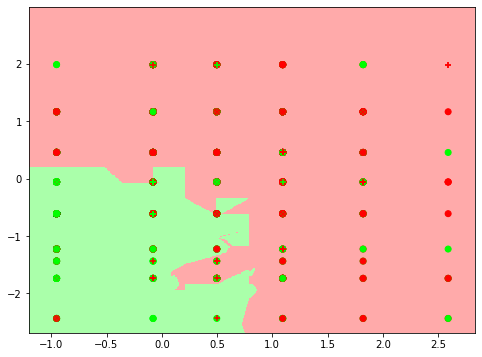

In [8]:
plot_cat_model(clf, X_train, y_train, X_test, y_test)

## Age, Education and Nicotine use
Nicotine is more universal and more legal, so this model did worse than the above variable comparison. The training error was worse, however the model did better when tested (closer errors).

In [9]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Alcohol']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]


clf = KNeighborsClassifier(n_neighbors=100) # Define the model
clf.fit(X_train, y_train); # Train the model

Training Error: 0.8183023872679045
Testing Error: 0.8408488063660478


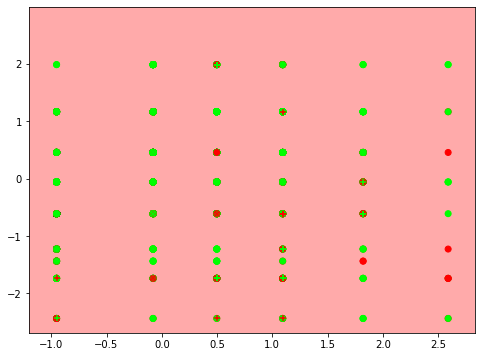

In [10]:
plot_cat_model(clf, X_train, y_train, X_test, y_test)

## Age, Education and Alcohol use
Although the training/testing errors are better than Nicotine, Alcohol is the most widely used substance so the graph is classifying everybody as a drinker, no matter Age or Education.
This error is only saying that around 80% of people in this data drank. 

## This is not a good model for alcohol use most likley because the use of alcohol is widespread throughout age and education. 

# Quadratic Discriminant Analysis 
If the correlation isn't linear, this model will be more useful than the above models.

In [11]:
X = np.array(druguser[['Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

In [12]:
mu_0 = X[y==0].mean()
mu_1 = X[y==1].mean()
mu_0, mu_1

(0.2172289972652689, -0.31151610406091373)

In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [14]:
def plot_cat_model(clf, X_train, y_train, X_test, y_test):

    h = 0.01 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 2, X_train[:, 1].max() + 2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))

In [15]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

Training Error: 0.7354111405835544
Testing Error: 0.7320954907161804


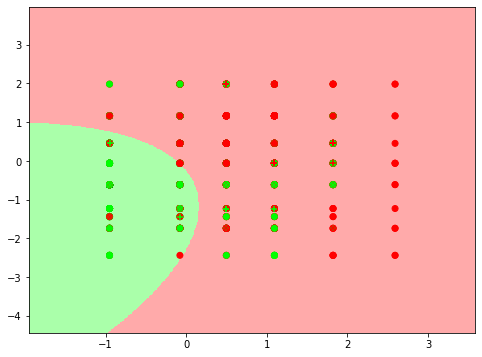

In [16]:
clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(X_train, y_train)
plot_cat_model(clf2, X_train, y_train, X_test, y_test)

Although the training/testing errors aren't the highest as above models, the graph did a pretty decent job at discriminating between the most commonly seen education/age of marjuana users. This is a better representation than the K nearest neighbors model as it is more flexible and smoother transition between points. This could possibly allow for better overfitting.

Next Steps: Apply newer models, make prettier/applicable graphs, continue narrowing focus using Bootstrapping/Cross Validation

In [17]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)           
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]  
y_test = y[:test]
X_train = X[test:]  
y_train = y[test:]

In [18]:
num = 50 
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for s in range(num):
    sample = np.random.randint(0, n, n) 
    Xboot[s] = X[sample, :]
    yboot[s] = y[sample]

test = int(0.20*n)

labels = ['train','test']

Error = pa.DataFrame(  np.array([0]*num*2).reshape(num, 2), columns = labels)

for s in range(num):
    X_test = Xboot[s][:test]
    y_test = yboot[s][:test]
    X_train = Xboot[s][test:]
    y_train = yboot[s][test:]
    
    clf2 = QuadraticDiscriminantAnalysis()
    clf2.fit(X_train, y_train)
    Error.iloc[s, 0] = clf2.score(X_train, y_train) 
    Error.iloc[s, 1] = clf2.score(X_test, y_test)
      
Error_mean = [0]*2
Error_std = [0]*2
for c in range(2):
    Error_mean[c] = np.mean(Error.iloc[:num, c])
    Error_std[c] = np.std(Error.iloc[:num, c])
    
Error = Error.append( pa.Series(Error_mean, index=Error.columns), ignore_index=True)
Error = Error.append( pa.Series(Error_std, index=Error.columns), ignore_index=True)
Error.index = list(range(num)) + ['Mean', 'Standard Deviation']
Error.tail()
   

,train,test
47,0.723475,0.745358
48,0.743369,0.732095
49,0.718833,0.732095
Mean,0.733581,0.733846
Standard Deviation,0.011566,0.025786


Application of Cross Validation did not work, so Bootstrapping was used. The Training and Testing errors are very close to each other. 

In [19]:
num = 50 
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for s in range(num):
    sample = np.random.randint(0, n, n) 
    Xboot[s] = X[sample, :]
    yboot[s] = y[sample]

test = int(0.20*n)

labels = ['train','test']

Error = pa.DataFrame(  np.array([0]*num*2).reshape(num, 2), columns = labels)

for s in range(num):
    X_test = Xboot[s][:test]
    y_test = yboot[s][:test]
    X_train = Xboot[s][test:]
    y_train = yboot[s][test:]
    
    clf2 = KNeighborsClassifier(n_neighbors=100)
    clf2.fit(X_train, y_train)
    Error.iloc[s, 0] = clf2.score(X_train, y_train) 
    Error.iloc[s, 1] = clf2.score(X_test, y_test)
      
Error_mean = [0]*2
Error_std = [0]*2
for c in range(2):
    Error_mean[c] = np.mean(Error.iloc[:num, c])
    Error_std[c] = np.std(Error.iloc[:num, c])
    
Error = Error.append( pa.Series(Error_mean, index=Error.columns), ignore_index=True)
Error = Error.append( pa.Series(Error_std, index=Error.columns), ignore_index=True)
Error.index = list(range(num)) + ['Mean', 'Standard Deviation']
Error.tail()
   

,train,test
47,0.736737,0.692308
48,0.728117,0.689655
49,0.722812,0.726790
Mean,0.736194,0.722281
Standard Deviation,0.013142,0.029823


After comparing the Quadratic Discriminant Analysis Bootstrap, and K Nearest Neighbors Bootstrap, Quadratic has shown to be the best model for our data, with a very slightly smaller standard deviation of error.  

Support Vector Model would not be successful with this data, and is not included for that reason.

# Decision tree 
Note: the graphviz package would not import properly, we can still use the method but we do not have the tree visual. 

In [20]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

In [21]:
def plot_cat_model(clf, X, y):
 
    # We shuffle the data using a random permutation

    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    clf.fit(X_train, y_train) # Fit the model

    nn = 2000
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),
        np.linspace(y_min, y_max, nn))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))

In [22]:
from sklearn.tree import DecisionTreeClassifier

Training Error: 0.6511936339522546
Testing Error: 0.6286472148541115


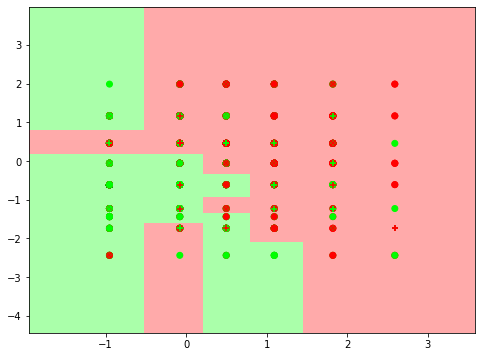

In [23]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Nicotine']]).reshape(-1)

tree = DecisionTreeClassifier(min_samples_leaf=5)
plot_cat_model(tree, X, y)

In [24]:
num = 50 
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for s in range(num):
    sample = np.random.randint(0, n, n) 
    Xboot[s] = X[sample, :]
    yboot[s] = y[sample]

test = int(0.20*n)

labels = ['train','test']

Error = pa.DataFrame(  np.array([0]*num*2).reshape(num, 2), columns = labels)

for s in range(num):
    X_test = Xboot[s][:test]
    y_test = yboot[s][:test]
    X_train = Xboot[s][test:]
    y_train = yboot[s][test:]
    
    clf2 = DecisionTreeClassifier(min_samples_leaf=5)
    clf2.fit(X_train, y_train)
    Error.iloc[s, 0] = clf2.score(X_train, y_train) 
    Error.iloc[s, 1] = clf2.score(X_test, y_test)
      
Error_mean = [0]*2
Error_std = [0]*2
for c in range(2):
    Error_mean[c] = np.mean(Error.iloc[:num, c])
    Error_std[c] = np.std(Error.iloc[:num, c])
    
Error = Error.append( pa.Series(Error_mean, index=Error.columns), ignore_index=True)
Error = Error.append( pa.Series(Error_std, index=Error.columns), ignore_index=True)
Error.index = list(range(num)) + ['Mean', 'Standard Deviation']
Error.tail()
   

,train,test
47,0.646552,0.673740
48,0.671088,0.644562
49,0.674403,0.612732
Mean,0.661844,0.638621
Standard Deviation,0.011122,0.019065


Bootstrapping on the decision tree showed us it is not as effective as the other models used. 

## Challenges
- Getting better results (over 80% error)
- Accounting for users and non users very different values
- Decision Tree visualization
- Drawing conclusions from data

## Next Steps
- Utilize more models to see if a better error % can be produced
- Draw conclusions from data
- Secondary question featuring a new drug

Jeremey: Main Code Guy
Sydney: Understanding Background information of variables/predictors
Ashley: Markdown

If this was for a high level research company, we don't think this would be worth putting money into it due to it having no sale value. It could be used as an advertising ploy involving the personality test scores/traits. It could also be a governmentally funded project.

In [25]:
keep = list(druguser.columns[druguser.dtypes!='object'][1:])

keep.remove('Alcohol')
##keep.remove('Amphet')
##keep.remove('Amyl')
##keep.remove('Benzos')
##keep.remove('Caff')
keep.remove('Cannabis')
##keep.remove('Choc')
keep.remove('Coke')
##keep.remove('Crack')
keep.remove('Ecstasy')
##keep.remove('Heroin')
##keep.remove('Ketamine')
##keep.remove('Legalh')
keep.remove('LSD')
##keep.remove('Meth')
keep.remove('Mushrooms')
keep.remove('Nicotine')
keep.remove('Semer')
##keep.remove('VSA')
X = np.array(druguser.loc[:, keep])
y = np.array(druguser.loc[:, 'Cannabis'])


In [26]:
tree = DecisionTreeClassifier(min_samples_leaf=5)
tree.fit(X, y)
tree.score(X, y)

0.8992042440318302

In [27]:
def plot_feature_importances(model, names, tol=10**-3):
    n_features = len(names)
    plot_names = []
    plot_importances = []
    
    for k in range(n_features):
        if model.feature_importances_[k] > tol:
            plot_names += [ names[k] ]
            plot_importances += [ model.feature_importances_[k] ]
    
    n_plot = len(plot_names)
    
    plt.figure(figsize = (10, 6))
    plt.barh(range(n_plot), plot_importances, align = 'center')
    plt.yticks(np.arange(n_plot), plot_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_plot)

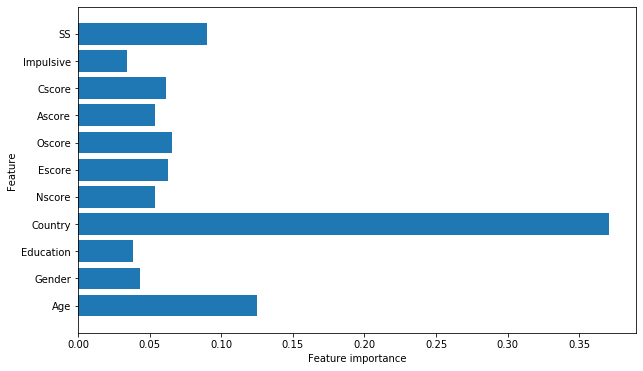

In [28]:
plot_feature_importances(tree, keep)